<a href="https://colab.research.google.com/github/Soumayan-pal01/Solar-Eclipse-Classification/blob/main/Solar_Eclipse_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import timedelta
import re
from sklearn.metrics import accuracy_score
from datetime import datetime

In [4]:
train_df=pd.read_csv("/content/drive/MyDrive/Solar Eclipse Classification/train.csv")

In [5]:
test_df=pd.read_csv("/content/drive/MyDrive/Solar Eclipse Classification/test.csv")

In [6]:
train_df.head()

,Unnamed: 0,Catalog Number,Calendar Date,Eclipse Time,Delta T (s),Lunation Number,Saros Number,Eclipse Type,Gamma,Eclipse Magnitude,Latitude,Longitude,Sun Altitude,Sun Azimuth,Path Width (km),Central Duration
0,0,1,-1999 June 12,3:14:51,NaN,-49456,NaN,T,NaN,NaN,6.0N,33.3W,NaN,344,247,06m37s
1,1,2,-1999 December 5,23:45:23,46426.0,-49450,10.0,A,-0.2317,0.9382,32.9S,10.8E,76.0,21,236,06m44s
2,2,3,-1998 June 1,18:09:16,46415.0,-49444,15.0,T,0.4994,1.0284,46.2N,83.4E,60.0,151,111,02m15s
3,3,4,-1998 November 25,5:57:03,46403.0,-49438,20.0,A,-0.9045,0.9806,67.8S,143.8W,25.0,74,162,01m14s
4,4,5,-1997 April 22,13:19:56,46393.0,-49433,-13.0,P,-1.4670,0.1611,60.6S,106.4W,0.0,281,NaN,NaN


In [7]:
test_df.head()

,Unnamed: 0,Catalog Number,Calendar Date,Eclipse Time,Delta T (s),Lunation Number,Saros Number,Eclipse Type,Gamma,Eclipse Magnitude,Latitude,Longitude,Sun Altitude,Sun Azimuth,Path Width (km),Central Duration
0,9518,9519,2005 April 8,20:36:51,65.0,65,129.0,H,-0.3473,1.0074,10.6S,119.0W,70.0,332,27,00m42s
1,9519,9520,2005 October 3,10:32:47,65.0,71,134.0,A,0.3306,0.9576,12.9N,28.7E,71.0,209,162,04m32s
2,9520,9521,2006 March 29,10:12:23,65.0,77,139.0,T,0.3843,1.0515,23.2N,16.7E,67.0,149,184,04m07s
3,9521,9522,2006 September 22,11:41:16,65.0,83,144.0,A,-0.4062,0.9352,20.6S,9.1W,66.0,31,261,07m09s
4,9522,9523,2007 March 19,2:32:57,65.0,89,149.0,P,1.0728,0.8756,61.0N,55.5E,0.0,92,NaN,NaN


In [8]:
frames = [train_df, test_df]
df = pd.concat(frames, sort=False)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11898 entries, 0 to 2379
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         11898 non-null  int64  
 1   Catalog Number     11898 non-null  int64  
 2   Calendar Date      11898 non-null  object 
 3   Eclipse Time       11898 non-null  object 
 4   Delta T (s)        11874 non-null  float64
 5   Lunation Number    11898 non-null  int64  
 6   Saros Number       11886 non-null  float64
 7   Eclipse Type       11898 non-null  object 
 8   Gamma              11878 non-null  float64
 9   Eclipse Magnitude  11868 non-null  float64
 10  Latitude           11898 non-null  object 
 11  Longitude          11898 non-null  object 
 12  Sun Altitude       11881 non-null  float64
 13  Sun Azimuth        11898 non-null  int64  
 14  Path Width (km)    7698 non-null   object 
 15  Central Duration   7698 non-null   object 
dtypes: float64(5), int64(4)

In [10]:
df.shape

(11898, 16)

In [11]:
df.columns

Index(['Unnamed: 0', 'Catalog Number', 'Calendar Date', 'Eclipse Time',
       'Delta T (s)', 'Lunation Number', 'Saros Number', 'Eclipse Type',
       'Gamma', 'Eclipse Magnitude', 'Latitude', 'Longitude', 'Sun Altitude',
       'Sun Azimuth', 'Path Width (km)', 'Central Duration'],
      dtype='object')

In [12]:
df.columns = df.columns.str.replace(' ','_') # replacing space between words with underscore
df.columns

Index(['Unnamed:_0', 'Catalog_Number', 'Calendar_Date', 'Eclipse_Time',
       'Delta_T_(s)', 'Lunation_Number', 'Saros_Number', 'Eclipse_Type',
       'Gamma', 'Eclipse_Magnitude', 'Latitude', 'Longitude', 'Sun_Altitude',
       'Sun_Azimuth', 'Path_Width_(km)', 'Central_Duration'],
      dtype='object')

In [13]:
df.dtypes

Unnamed:_0             int64
Catalog_Number         int64
Calendar_Date         object
Eclipse_Time          object
Delta_T_(s)          float64
Lunation_Number        int64
Saros_Number         float64
Eclipse_Type          object
Gamma                float64
Eclipse_Magnitude    float64
Latitude              object
Longitude             object
Sun_Altitude         float64
Sun_Azimuth            int64
Path_Width_(km)       object
Central_Duration      object
dtype: object

In [14]:
df['Eclipse_Type'].value_counts()

P     3875
A     3755
T     3049
H      502
Pb     163
Pe     162
Am      72
Tm      72
An      36
A-      34
A+      34
H3      26
As      25
H2      24
Hm      17
T-      17
Tn      14
Ts      12
T+       9
Name: Eclipse_Type, dtype: int64

In [15]:
def EclipseClean(x):  # only 4 types of lunar eclipse: P, A, T, H 
    if 'P' in x:
        return('P')
    if 'A' in x:
        return('A')
    if 'T' in x:
        return('T')
    if 'H' in x:
        return('H')

In [16]:
df['Eclipse_Type'] = list(map(EclipseClean,df['Eclipse_Type']))
df['Eclipse_Type'].value_counts()

P    4200
A    3956
T    3173
H     569
Name: Eclipse_Type, dtype: int64

In [17]:
len(df['Eclipse_Type'].value_counts())

4

In [18]:
df = df.drop(df[df.Eclipse_Type == 'H'].index) #removing hybrid category to avoid unnecessary outliers

In [19]:
df['Eclipse_Type'].value_counts()

P    4138
A    3887
T    3110
Name: Eclipse_Type, dtype: int64

In [20]:
df['Latitude_Number'] = df['Latitude'].str.replace('([A-Z]+)', '')
df['Latitude_Letter'] = df['Latitude'].str.extract('([A-Z]+)')

df['Longitude_Number'] = df['Longitude'].str.replace('([A-Z]+)', '')
df['Longitude_Letter'] = df['Longitude'].str.extract('([A-Z]+)')

df.drop(columns =["Latitude", "Longitude"], inplace = True) 
df.head()

,Unnamed:_0,Catalog_Number,Calendar_Date,Eclipse_Time,Delta_T_(s),Lunation_Number,Saros_Number,Eclipse_Type,Gamma,Eclipse_Magnitude,Sun_Altitude,Sun_Azimuth,Path_Width_(km),Central_Duration,Latitude_Number,Latitude_Letter,Longitude_Number,Longitude_Letter
1,1,2,-1999 December 5,23:45:23,46426.0,-49450,10.0,A,-0.2317,0.9382,76.0,21,236,06m44s,32.9,S,10.8,E
2,2,3,-1998 June 1,18:09:16,46415.0,-49444,15.0,T,0.4994,1.0284,60.0,151,111,02m15s,46.2,N,83.4,E
3,3,4,-1998 November 25,5:57:03,46403.0,-49438,20.0,A,-0.9045,0.9806,25.0,74,162,01m14s,67.8,S,143.8,W
4,4,5,-1997 April 22,13:19:56,46393.0,-49433,-13.0,P,-1.4670,0.1611,0.0,281,NaN,NaN,60.6,S,106.4,W
5,5,6,-1997 May 22,2:45:35,46391.0,-49432,25.0,P,1.3253,0.4035,0.0,55,NaN,NaN,61.7,N,151.7,W


In [21]:

df.isnull().sum()

Unnamed:_0              0
Catalog_Number          0
Calendar_Date           0
Eclipse_Time            0
Delta_T_(s)            23
Lunation_Number         0
Saros_Number           11
Eclipse_Type            0
Gamma                  19
Eclipse_Magnitude      27
Sun_Altitude           16
Sun_Azimuth             0
Path_Width_(km)      4138
Central_Duration     4138
Latitude_Number         0
Latitude_Letter         0
Longitude_Number        0
Longitude_Letter        0
dtype: int64

In [22]:
df.dropna(how='any', subset=['Delta_T_(s)','Saros_Number','Gamma','Eclipse_Magnitude','Sun_Altitude'], inplace=True)

In [23]:
df = df.drop(["Path_Width_(km)", "Central_Duration",'Unnamed:_0','Catalog_Number'], axis=1)

In [24]:
df.isnull().sum()

Calendar_Date        0
Eclipse_Time         0
Delta_T_(s)          0
Lunation_Number      0
Saros_Number         0
Eclipse_Type         0
Gamma                0
Eclipse_Magnitude    0
Sun_Altitude         0
Sun_Azimuth          0
Latitude_Number      0
Latitude_Letter      0
Longitude_Number     0
Longitude_Letter     0
dtype: int64

In [25]:
df

,Calendar_Date,Eclipse_Time,Delta_T_(s),Lunation_Number,Saros_Number,Eclipse_Type,Gamma,Eclipse_Magnitude,Sun_Altitude,Sun_Azimuth,Latitude_Number,Latitude_Letter,Longitude_Number,Longitude_Letter
1,-1999 December 5,23:45:23,46426.0,-49450,10.0,A,-0.2317,0.9382,76.0,21,32.9,S,10.8,E
2,-1998 June 1,18:09:16,46415.0,-49444,15.0,T,0.4994,1.0284,60.0,151,46.2,N,83.4,E
3,-1998 November 25,5:57:03,46403.0,-49438,20.0,A,-0.9045,0.9806,25.0,74,67.8,S,143.8,W
4,-1997 April 22,13:19:56,46393.0,-49433,-13.0,P,-1.4670,0.1611,0.0,281,60.6,S,106.4,W
5,-1997 May 22,2:45:35,46391.0,-49432,25.0,P,1.3253,0.4035,0.0,55,61.7,N,151.7,W
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2374,2998 June 15,14:49:27,4410.0,12349,182.0,P,-1.0158,0.9792,0.0,9,66.5,S,32.5,W
2375,2998 December 10,3:18:31,4414.0,12355,187.0,P,1.2838,0.4773,0.0,179,67.2,N,145.0,E
2376,2999 May 6,23:23:57,4417.0,12360,154.0,T,0.8388,1.0566,33.0,146,71.5,N,177.3,E
2377,2999 October 30,9:34:33,4420.0,12366,159.0,A,-1.0023,0.9586,0.0,137,70.9,S,84.7,W


In [26]:
def cleaning1(x):     
    if '-' in x:
        x = x.replace('-','')
    return x

In [27]:
df['Cleaned_Dates'] = list(map(cleaning1, df['Calendar_Date']))   #column without -ve symbol
df.head()

,Calendar_Date,Eclipse_Time,Delta_T_(s),Lunation_Number,Saros_Number,Eclipse_Type,Gamma,Eclipse_Magnitude,Sun_Altitude,Sun_Azimuth,Latitude_Number,Latitude_Letter,Longitude_Number,Longitude_Letter,Cleaned_Dates
1,-1999 December 5,23:45:23,46426.0,-49450,10.0,A,-0.2317,0.9382,76.0,21,32.9,S,10.8,E,1999 December 5
2,-1998 June 1,18:09:16,46415.0,-49444,15.0,T,0.4994,1.0284,60.0,151,46.2,N,83.4,E,1998 June 1
3,-1998 November 25,5:57:03,46403.0,-49438,20.0,A,-0.9045,0.9806,25.0,74,67.8,S,143.8,W,1998 November 25
4,-1997 April 22,13:19:56,46393.0,-49433,-13.0,P,-1.4670,0.1611,0.0,281,60.6,S,106.4,W,1997 April 22
5,-1997 May 22,2:45:35,46391.0,-49432,25.0,P,1.3253,0.4035,0.0,55,61.7,N,151.7,W,1997 May 22


In [28]:
def cleaning2(x):                       #extracting months and removing -ve symbols
    if '-' in x:
        x = x.replace('-','')
    return((re.findall('[A-z]+', x))[0])      

In [29]:
df['Cleaned_Dates_Month'] = list(map(cleaning2, df['Calendar_Date']))
df['Cleaned_Dates_Month']

1       December
2           June
3       November
4          April
5            May
          ...   
2374        June
2375    December
2376         May
2377     October
2378       April
Name: Cleaned_Dates_Month, Length: 11074, dtype: object

In [30]:
def cleaning3(x):                     #extracting years and removing -ve symbols
    if '-' in x:
        x = x.replace('-','')
    temp = re.findall('\d\d\d\d', x)
    if len(temp)>0:
        return temp[0]
    else:
        return temp

In [31]:
df['Cleaned_Dates_Year'] = list(map(cleaning3, df['Calendar_Date']))
df['Cleaned_Dates_Year']


1       1999
2       1998
3       1998
4       1997
5       1997
        ... 
2374    2998
2375    2998
2376    2999
2377    2999
2378    3000
Name: Cleaned_Dates_Year, Length: 11074, dtype: object

In [32]:
df = df.drop(["Calendar_Date"], axis=1)
df

,Eclipse_Time,Delta_T_(s),Lunation_Number,Saros_Number,Eclipse_Type,Gamma,Eclipse_Magnitude,Sun_Altitude,Sun_Azimuth,Latitude_Number,Latitude_Letter,Longitude_Number,Longitude_Letter,Cleaned_Dates,Cleaned_Dates_Month,Cleaned_Dates_Year
1,23:45:23,46426.0,-49450,10.0,A,-0.2317,0.9382,76.0,21,32.9,S,10.8,E,1999 December 5,December,1999
2,18:09:16,46415.0,-49444,15.0,T,0.4994,1.0284,60.0,151,46.2,N,83.4,E,1998 June 1,June,1998
3,5:57:03,46403.0,-49438,20.0,A,-0.9045,0.9806,25.0,74,67.8,S,143.8,W,1998 November 25,November,1998
4,13:19:56,46393.0,-49433,-13.0,P,-1.4670,0.1611,0.0,281,60.6,S,106.4,W,1997 April 22,April,1997
5,2:45:35,46391.0,-49432,25.0,P,1.3253,0.4035,0.0,55,61.7,N,151.7,W,1997 May 22,May,1997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2374,14:49:27,4410.0,12349,182.0,P,-1.0158,0.9792,0.0,9,66.5,S,32.5,W,2998 June 15,June,2998
2375,3:18:31,4414.0,12355,187.0,P,1.2838,0.4773,0.0,179,67.2,N,145.0,E,2998 December 10,December,2998
2376,23:23:57,4417.0,12360,154.0,T,0.8388,1.0566,33.0,146,71.5,N,177.3,E,2999 May 6,May,2999
2377,9:34:33,4420.0,12366,159.0,A,-1.0023,0.9586,0.0,137,70.9,S,84.7,W,2999 October 30,October,2999


In [33]:
df_categories = df.select_dtypes(object)
df_categories 

,Eclipse_Time,Eclipse_Type,Latitude_Number,Latitude_Letter,Longitude_Number,Longitude_Letter,Cleaned_Dates,Cleaned_Dates_Month,Cleaned_Dates_Year
1,23:45:23,A,32.9,S,10.8,E,1999 December 5,December,1999
2,18:09:16,T,46.2,N,83.4,E,1998 June 1,June,1998
3,5:57:03,A,67.8,S,143.8,W,1998 November 25,November,1998
4,13:19:56,P,60.6,S,106.4,W,1997 April 22,April,1997
5,2:45:35,P,61.7,N,151.7,W,1997 May 22,May,1997
...,...,...,...,...,...,...,...,...,...
2374,14:49:27,P,66.5,S,32.5,W,2998 June 15,June,2998
2375,3:18:31,P,67.2,N,145.0,E,2998 December 10,December,2998
2376,23:23:57,T,71.5,N,177.3,E,2999 May 6,May,2999
2377,9:34:33,A,70.9,S,84.7,W,2999 October 30,October,2999


In [34]:
#Converting Latitude_number and Longitude_number to float type from object type
df["Latitude_Number"] = pd.to_numeric(df["Latitude_Number"])
df["Longitude_Number"] = pd.to_numeric(df["Longitude_Number"])
df.head()

,Eclipse_Time,Delta_T_(s),Lunation_Number,Saros_Number,Eclipse_Type,Gamma,Eclipse_Magnitude,Sun_Altitude,Sun_Azimuth,Latitude_Number,Latitude_Letter,Longitude_Number,Longitude_Letter,Cleaned_Dates,Cleaned_Dates_Month,Cleaned_Dates_Year
1,23:45:23,46426.0,-49450,10.0,A,-0.2317,0.9382,76.0,21,32.9,S,10.8,E,1999 December 5,December,1999
2,18:09:16,46415.0,-49444,15.0,T,0.4994,1.0284,60.0,151,46.2,N,83.4,E,1998 June 1,June,1998
3,5:57:03,46403.0,-49438,20.0,A,-0.9045,0.9806,25.0,74,67.8,S,143.8,W,1998 November 25,November,1998
4,13:19:56,46393.0,-49433,-13.0,P,-1.4670,0.1611,0.0,281,60.6,S,106.4,W,1997 April 22,April,1997
5,2:45:35,46391.0,-49432,25.0,P,1.3253,0.4035,0.0,55,61.7,N,151.7,W,1997 May 22,May,1997


In [35]:
df.dtypes

Eclipse_Time            object
Delta_T_(s)            float64
Lunation_Number          int64
Saros_Number           float64
Eclipse_Type            object
Gamma                  float64
Eclipse_Magnitude      float64
Sun_Altitude           float64
Sun_Azimuth              int64
Latitude_Number        float64
Latitude_Letter         object
Longitude_Number       float64
Longitude_Letter        object
Cleaned_Dates           object
Cleaned_Dates_Month     object
Cleaned_Dates_Year      object
dtype: object

In [36]:
df_Categoricals = df.select_dtypes(object)
df_Categoricals.head()

,Eclipse_Time,Eclipse_Type,Latitude_Letter,Longitude_Letter,Cleaned_Dates,Cleaned_Dates_Month,Cleaned_Dates_Year
1,23:45:23,A,S,E,1999 December 5,December,1999
2,18:09:16,T,N,E,1998 June 1,June,1998
3,5:57:03,A,S,W,1998 November 25,November,1998
4,13:19:56,P,S,W,1997 April 22,April,1997
5,2:45:35,P,N,W,1997 May 22,May,1997


In [37]:

len(df_Categoricals.columns)

7

In [38]:
len(df.dtypes)

16

In [39]:
df = df.drop(['Latitude_Number', 'Longitude_Number', 'Latitude_Letter', 'Longitude_Letter', 'Eclipse_Time'], axis=1)

In [40]:
df_Numericals = df._get_numeric_data()
df_Numericals

,Delta_T_(s),Lunation_Number,Saros_Number,Gamma,Eclipse_Magnitude,Sun_Altitude,Sun_Azimuth
1,46426.0,-49450,10.0,-0.2317,0.9382,76.0,21
2,46415.0,-49444,15.0,0.4994,1.0284,60.0,151
3,46403.0,-49438,20.0,-0.9045,0.9806,25.0,74
4,46393.0,-49433,-13.0,-1.4670,0.1611,0.0,281
5,46391.0,-49432,25.0,1.3253,0.4035,0.0,55
...,...,...,...,...,...,...,...
2374,4410.0,12349,182.0,-1.0158,0.9792,0.0,9
2375,4414.0,12355,187.0,1.2838,0.4773,0.0,179
2376,4417.0,12360,154.0,0.8388,1.0566,33.0,146
2377,4420.0,12366,159.0,-1.0023,0.9586,0.0,137


In [41]:
corr_matrix = df_Numericals.corr()
corr_matrix.head()

,Delta_T_(s),Lunation_Number,Saros_Number,Gamma,Eclipse_Magnitude,Sun_Altitude,Sun_Azimuth
Delta_T_(s),1.000000,-0.894725,-0.858658,-0.001880,-0.014261,-0.002621,-0.003974
Lunation_Number,-0.894725,1.000000,0.963854,0.000418,0.003447,0.001674,0.006122
Saros_Number,-0.858658,0.963854,1.000000,-0.001052,0.001944,0.001359,-0.034480
Gamma,-0.001880,0.000418,-0.001052,1.000000,0.004577,0.002135,-0.005310
Eclipse_Magnitude,-0.014261,0.003447,0.001944,0.004577,1.000000,0.690661,0.006363


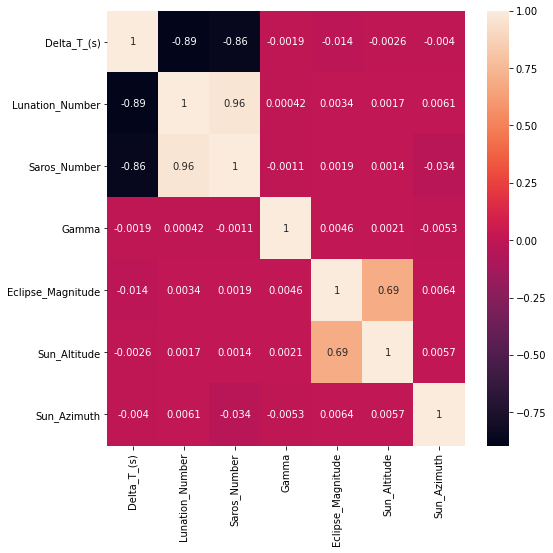

In [42]:
fig, ax = plt.subplots(figsize=(8,8))
heatmap = sns.heatmap(corr_matrix, annot =True, ax=ax)
heatmap

In [43]:
# Due to high correlation, we are dropping 'Saros_Number' & 'Lunation_Number'

df = df.drop(['Saros_Number', 'Lunation_Number'], axis=1)

In [44]:
df_Numericals = df._get_numeric_data()
df_Numericals

,Delta_T_(s),Gamma,Eclipse_Magnitude,Sun_Altitude,Sun_Azimuth
1,46426.0,-0.2317,0.9382,76.0,21
2,46415.0,0.4994,1.0284,60.0,151
3,46403.0,-0.9045,0.9806,25.0,74
4,46393.0,-1.4670,0.1611,0.0,281
5,46391.0,1.3253,0.4035,0.0,55
...,...,...,...,...,...
2374,4410.0,-1.0158,0.9792,0.0,9
2375,4414.0,1.2838,0.4773,0.0,179
2376,4417.0,0.8388,1.0566,33.0,146
2377,4420.0,-1.0023,0.9586,0.0,137


In [45]:
corr_matrix = df_Numericals.corr()
corr_matrix.head()

,Delta_T_(s),Gamma,Eclipse_Magnitude,Sun_Altitude,Sun_Azimuth
Delta_T_(s),1.000000,-0.001880,-0.014261,-0.002621,-0.003974
Gamma,-0.001880,1.000000,0.004577,0.002135,-0.005310
Eclipse_Magnitude,-0.014261,0.004577,1.000000,0.690661,0.006363
Sun_Altitude,-0.002621,0.002135,0.690661,1.000000,0.005716
Sun_Azimuth,-0.003974,-0.005310,0.006363,0.005716,1.000000


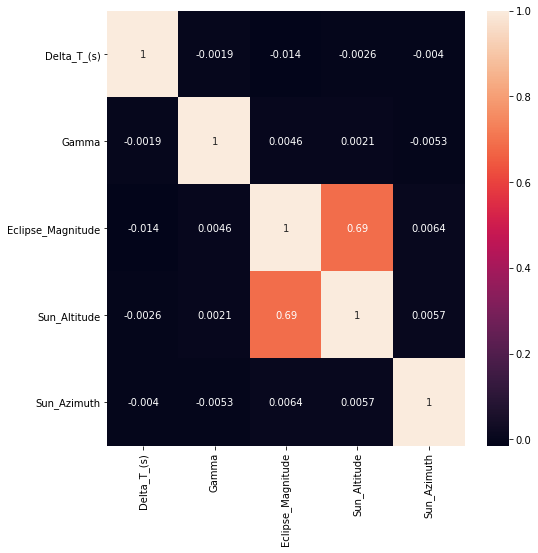

In [46]:
fig, ax = plt.subplots(figsize=(8,8))
heatmap = sns.heatmap(corr_matrix, annot =True, ax=ax)
heatmap

([0, 1, 2], <a list of 3 Text major ticklabel objects>)

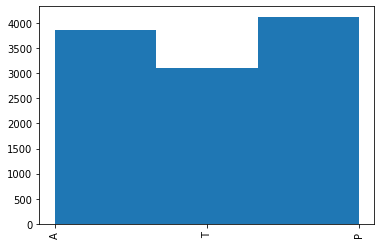

In [47]:
plt.hist(df["Eclipse_Type"], bins = len(df["Eclipse_Type"].unique()))
plt.xticks(rotation='vertical')

In [48]:
import pandas as pd
from sklearn import preprocessing

x = df_Numericals.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df2 = pd.DataFrame(x_scaled)

In [49]:
df2.head()

,0,1,2,3,4
0,1.000000,0.425946,0.867659,0.844444,0.058333
1,0.999763,0.658810,0.951077,0.666667,0.419444
2,0.999505,0.211651,0.906871,0.277778,0.205556
3,0.999289,0.032488,0.148987,0.000000,0.780556
4,0.999246,0.921869,0.373162,0.000000,0.152778


In [50]:
df.head()

,Delta_T_(s),Eclipse_Type,Gamma,Eclipse_Magnitude,Sun_Altitude,Sun_Azimuth,Cleaned_Dates,Cleaned_Dates_Month,Cleaned_Dates_Year
1,46426.0,A,-0.2317,0.9382,76.0,21,1999 December 5,December,1999
2,46415.0,T,0.4994,1.0284,60.0,151,1998 June 1,June,1998
3,46403.0,A,-0.9045,0.9806,25.0,74,1998 November 25,November,1998
4,46393.0,P,-1.4670,0.1611,0.0,281,1997 April 22,April,1997
5,46391.0,P,1.3253,0.4035,0.0,55,1997 May 22,May,1997


In [51]:
df.dtypes

Delta_T_(s)            float64
Eclipse_Type            object
Gamma                  float64
Eclipse_Magnitude      float64
Sun_Altitude           float64
Sun_Azimuth              int64
Cleaned_Dates           object
Cleaned_Dates_Month     object
Cleaned_Dates_Year      object
dtype: object

In [52]:
df_Categoricals.head()

,Eclipse_Time,Eclipse_Type,Latitude_Letter,Longitude_Letter,Cleaned_Dates,Cleaned_Dates_Month,Cleaned_Dates_Year
1,23:45:23,A,S,E,1999 December 5,December,1999
2,18:09:16,T,N,E,1998 June 1,June,1998
3,5:57:03,A,S,W,1998 November 25,November,1998
4,13:19:56,P,S,W,1997 April 22,April,1997
5,2:45:35,P,N,W,1997 May 22,May,1997


In [53]:
df.columns

Index(['Delta_T_(s)', 'Eclipse_Type', 'Gamma', 'Eclipse_Magnitude',
       'Sun_Altitude', 'Sun_Azimuth', 'Cleaned_Dates', 'Cleaned_Dates_Month',
       'Cleaned_Dates_Year'],
      dtype='object')

In [54]:
numericals = df._get_numeric_data()
numericals = pd.DataFrame(numericals)
numericals

,Delta_T_(s),Gamma,Eclipse_Magnitude,Sun_Altitude,Sun_Azimuth
1,46426.0,-0.2317,0.9382,76.0,21
2,46415.0,0.4994,1.0284,60.0,151
3,46403.0,-0.9045,0.9806,25.0,74
4,46393.0,-1.4670,0.1611,0.0,281
5,46391.0,1.3253,0.4035,0.0,55
...,...,...,...,...,...
2374,4410.0,-1.0158,0.9792,0.0,9
2375,4414.0,1.2838,0.4773,0.0,179
2376,4417.0,0.8388,1.0566,33.0,146
2377,4420.0,-1.0023,0.9586,0.0,137


In [55]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(numericals)
normalized_x = transformer.transform(numericals)
pd.DataFrame(normalized_x)

,0,1,2,3,4
0,0.999999,-0.000005,0.000020,0.001637,0.000452
1,0.999994,0.000011,0.000022,0.001293,0.003253
2,0.999999,-0.000019,0.000021,0.000539,0.001595
3,0.999982,-0.000032,0.000003,0.000000,0.006057
4,0.999999,0.000029,0.000009,0.000000,0.001186
...,...,...,...,...,...
11069,0.999998,-0.000230,0.000222,0.000000,0.002041
11070,0.999179,0.000291,0.000108,0.000000,0.040519
11071,0.999426,0.000190,0.000239,0.007467,0.033035
11072,0.999520,-0.000227,0.000217,0.000000,0.030981


In [56]:
categoricals = df.select_dtypes('object')
categoricals = categoricals['Eclipse_Type']
y = categoricals

In [57]:
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [58]:
# defining the target variable (dependent variable) as y

y = df.Eclipse_Type

In [59]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()  
y = le.fit_transform(y)
y

array([0, 2, 0, ..., 2, 0, 2])

In [60]:
# creating training and testing variables
# test_size = the percentage of the data for testing. It’s usually around 80/20 or 70/30. In this case 80/20

X_train, X_test, y_train, y_test = train_test_split(normalized_x, y, test_size=0.2)

In [61]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8859, 5) (8859,)
(2215, 5) (2215,)


##Using Linear Regression

In [62]:
# fitting the model on the training data


lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [63]:
# show first five predicted values
predictions[0:5]

array([0.93791445, 0.92778967, 0.90933984, 0.89729202, 0.93933974])

Text(0, 0.5, "['Predictions']")

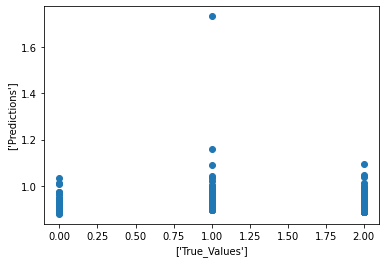

In [64]:
# plotting the model - The line / model

plt.scatter(y_test, predictions)
plt.xlabel(['True_Values'])
plt.ylabel(['Predictions'])

##Using Logistic Regression

In [65]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [66]:
# Training the Logistic Regression Model:

In [67]:
# Split data into 'X' features and 'y' target label sets

X = normalized_x
y = le.fit_transform(y)


In [68]:
# Import module to split dataset

from sklearn.model_selection import train_test_split

# Split data set into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 
# random_state= _no._ simply sets a seed to the random generator, so that your train-test splits are always deterministic. If you don't set a seed, it is different each time.

In [69]:
from sklearn.linear_model import LogisticRegression

# Create instance (i.e. object) of LogisticRegression
logmodel = LogisticRegression()

# Fit the model using the training data
# X_train -> parameter supplies the data features
# y_train -> parameter supplies the target labels
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [70]:
pd.DataFrame(y_test)

,0
0,2
1,0
2,2
3,0
4,1
...,...
2210,0
2211,1
2212,1
2213,1


In [71]:
from sklearn.metrics import classification_report, accuracy_score
predictions = logmodel.predict(pd.DataFrame(X_test))

In [72]:
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.55      0.48      0.51       754
           1       0.54      1.00      0.70       837
           2       0.00      0.00      0.00       624

    accuracy                           0.54      2215
   macro avg       0.36      0.49      0.40      2215
weighted avg       0.39      0.54      0.44      2215

0.5399548532731377


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##Using Random Forest Algorithm

In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [74]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [75]:
from sklearn.ensemble import RandomForestClassifier

randomForestClassification = RandomForestClassifier(n_estimators=100,random_state=259)
randomForestClassification.fit(X_train, y_train)
y_pred = randomForestClassification.predict(X_test)

In [76]:
pd.Series(y_pred).value_counts()

1    853
0    757
2    605
dtype: int64

In [77]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77       742
           1       0.98      1.00      0.99       840
           2       0.74      0.71      0.73       633

    accuracy                           0.84      2215
   macro avg       0.83      0.83      0.83      2215
weighted avg       0.84      0.84      0.84      2215

0.8433408577878104


In [78]:
randomForestClassification.feature_importances_

array([0.09079041, 0.11876763, 0.17335743, 0.52255733, 0.0945272 ])

##SVM ALGORITHM - Support Vector Machine / Classification¶

In [79]:

# X = normalized_x
# y = le.fit_transform(y)

In [80]:
from sklearn.svm import SVC # "Support Vector Classifier" 
clf = SVC(kernel='linear') 
  
# fitting x samples and y classes 
clf.fit(X, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [81]:
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.32      0.29      0.30       742
           1       0.38      0.70      0.49       840
           2       0.00      0.00      0.00       633

    accuracy                           0.36      2215
   macro avg       0.23      0.33      0.26      2215
weighted avg       0.25      0.36      0.29      2215

0.36027088036117383


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##Therefore, here we can see that Random Forest Algorithm gives the best Accuracy(84%)